In [22]:
# Univariate Linear Regression 
%matplotlib inline
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [23]:
data = pd.read_csv("ex1data1.txt", header=None, names=['Population', 'Profit']) 
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [24]:
# m is the size of the data points 
m = data.shape[0]

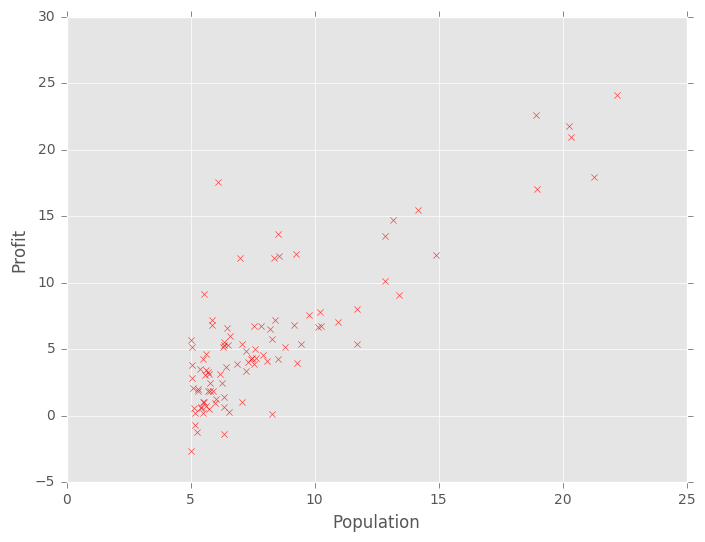

In [25]:
data.plot(kind='scatter', x='Population', y='Profit', marker= 'x', 
                          alpha = 0.7, color= 'r', figsize=(8,6))  

In [26]:
# We first implement linear regression here with one variable in a procedural (non-vectorized) way
# It takes a while to execute. Not computationally viable
"""The hypothesis function for univariate linear regression"""
def h(theta0, theta1, x):
    return theta0 + theta1 * x

"""The cost fucntion"""
def cost(theta0, theta1, data):
    z = sum((h(theta0, theta1, d[1][0]) - d[1][1]) ** 2 for d in data.iterrows())
    return (1.0/(2*m)) * z

# Setting alpha and initializing parameters of the model 
theta0, theta1 = 0, 0
alpha = 0.01

# Running gradient descent in 1500 iterations 
costs = []
for i in range(1500):
    costs.append(cost(theta0, theta1, data))
    z = sum(h(theta0, theta1, d[1][0]) - d[1][1] for d in data.iterrows())
    theta0 = theta0 - alpha * (1.0/m) * z
    z = sum(((h(theta0, theta1, d[1][0]) - d[1][1]) * d[1][0]) for d in data.iterrows())
    theta1 = theta1 - alpha * (1.0/m) * z
 
##
print('initial costs: ', costs[0:10])
print('final costs: ', costs[-10:-1])

initial costs:  [32.072733877455654, 6.7937276907175193, 5.9345957714720896, 5.9014281222320975, 5.8955030910007817, 5.8903623325570615, 5.8852367601258351, 5.8801242643609957, 5.8750291482938994, 5.8699523106013274]
final costs:  [4.4833396524280476, 4.4833165267533044, 4.4832934850568327, 4.4832705270336701, 4.4832476523799691, 4.4832248607929888, 4.4832021519710681, 4.4831795256136617, 4.483156981421315]


(4, 6)

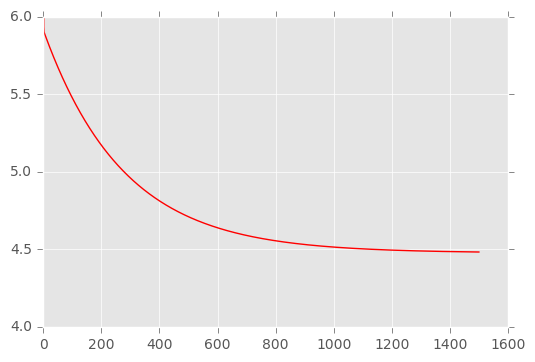

In [27]:
# We plot the changes of costs over 1500 iterations to see if the algorithm is working
plt.plot(range(len(costs)),costs,'r')
plt.ylim(ymin=4, ymax=6)

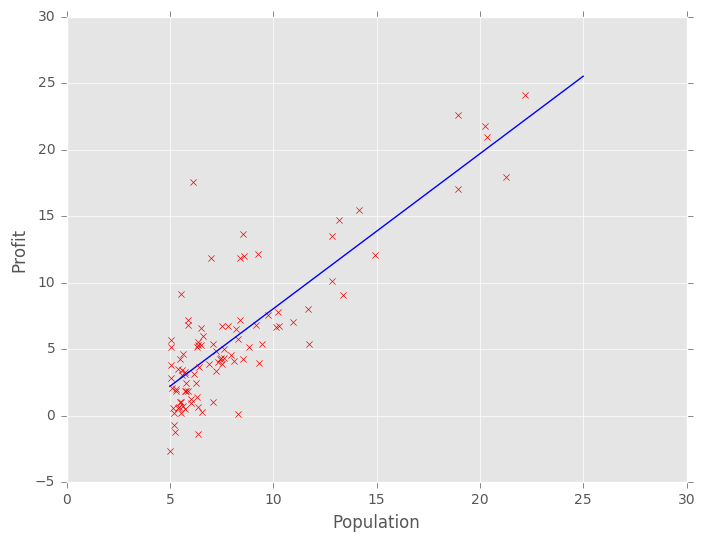

In [31]:
# drawing regression line on top of the population-profit plot 
# note: plt.subplots() is a function that returns a tuple containing a figure and axes object(s)
fig, ax = plt.subplots(figsize=(8,6))
x = np.linspace(5, 25)
ax.plot(x, theta0 + theta1 * x , 'b', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Traning Data', color = 'r', marker = 'x')
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')